In [1]:
import numpy as np  
from qutip import *
import matplotlib.pyplot as plt
from _funcs import *

import seaborn as sns
plt.rc('text', usetex=True)
sns.set()


In [57]:
N = 3
gamma = 1

a = destroy(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)
n = a.dag()*a

H = identity(N)
c_ops = [np.sqrt(gamma)*a]

dt = 0.01
tf = 10
t = np.arange(0, tf, dt)

rho0 = (fock(N, 1) + fock(N, 0)).unit()

In [78]:
result = ssesolve(H, rho0, t, sc_ops=c_ops, e_ops=[x, p, n], store_measurement=True)
result_u = mesolve(H, rho0, t, c_ops=c_ops, e_ops=[x, p, n])

Total run time:   0.01s


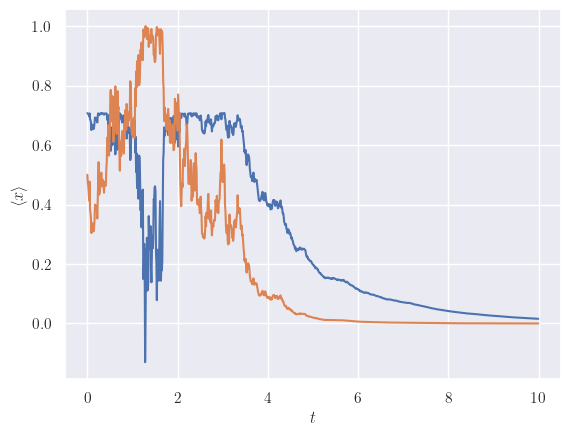

In [82]:
plt.plot(t, result.expect[0])
plt.plot(t, result.expect[2])
# plt.plot(t, result_u.expect[0])
plt.xlabel(r'$t$')
plt.ylabel(r'$\langle x \rangle$')
plt.show()